Best Scoring Parameters Combination for Each Feature:


,features,pattern,max_depth,criterion,class_weight,accuracy,micro_f1,macro_f1
98,5-spaced_remove,10000000000101000000100000001,40.0,gini,NaN,0.907285,0.907285,0.917665
419,5-spaced_replace,1000000000010010000000101,NaN,gini,NaN,0.822069,0.822069,0.755985
753,6-spaced_remove,100010010101001,30.0,gini,NaN,0.960280,0.960280,0.952385
890,6-spaced_replace,100100000000100000100000000010001,40.0,gini,balanced,0.933935,0.933935,0.914496
1075,7-spaced_remove,1000000100000100100000010010001,NaN,gini,NaN,0.967271,0.967271,0.962491
1419,7-spaced_replace,100001001000000000001000010001001,NaN,gini,balanced,0.963319,0.963319,0.959546


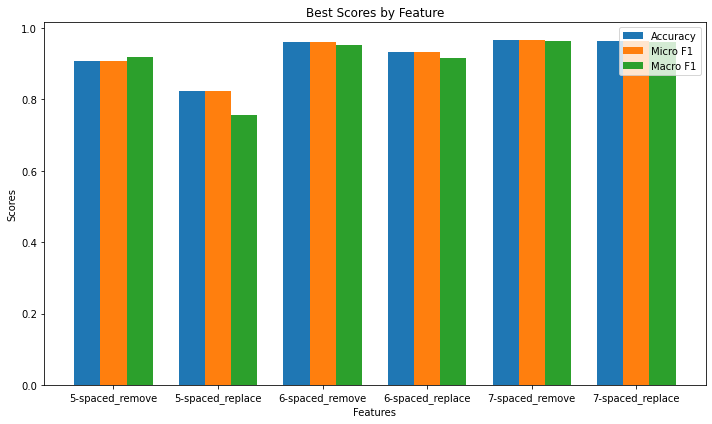

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data into DataFrame
data = pd.read_csv("../results/spaced_results.csv")

# Find the best scoring parameters combination for each feature
best_scores = data.loc[data.groupby('features')['accuracy'].idxmax()]

# Display the best scores records in a table
print("Best Scoring Parameters Combination for Each Feature:")
display(best_scores)

# Plotting
plt.figure(figsize=(10, 6))

# Setting the bar width
bar_width = 0.25

# Setting the positions of the bars
bar_positions = np.arange(len(best_scores['features']))

# Plotting each score as a separate bar, side by side
plt.bar(bar_positions - bar_width, best_scores['accuracy'], width=bar_width, label='Accuracy')
plt.bar(bar_positions, best_scores['micro_f1'], width=bar_width, label='Micro F1')
plt.bar(bar_positions + bar_width, best_scores['macro_f1'], width=bar_width, label='Macro F1')

plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Best Scores by Feature')
plt.legend()
plt.xticks(bar_positions, best_scores['features'])
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
stats = data.groupby('features').agg({'accuracy': ['mean', 'std'], 'micro_f1': ['mean', 'std'], 'macro_f1': ['mean', 'std']})

# Renaming the columns for better readability
stats.columns = ['_'.join(col).strip() for col in stats.columns.values]

# Resetting index to make 'features' a column again for display
stats.reset_index(inplace=True)

# Display the table with mean and standard deviations
print("Mean and Standard Deviations for Each Feature Type:")
display(stats)

Mean and Standard Deviations for Each Feature Type:


,features,accuracy_mean,accuracy_std,micro_f1_mean,micro_f1_std,macro_f1_mean,macro_f1_std
0,5-spaced_remove,0.887618,0.007484,0.887618,0.007484,0.902130,0.005888
1,5-spaced_replace,0.803145,0.010040,0.803145,0.010040,0.757626,0.009291
2,6-spaced_remove,0.947175,0.004822,0.947175,0.004822,0.943258,0.004690
3,6-spaced_replace,0.925522,0.004920,0.925522,0.004920,0.898694,0.010071
4,7-spaced_remove,0.958811,0.003914,0.958811,0.003914,0.950864,0.007180
5,7-spaced_replace,0.957743,0.003848,0.957743,0.003848,0.945684,0.008220
